In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)


# IMPORT COLE'S MERGED DATASET

In [2]:
df = pd.read_csv("full_data_long.csv", header = 'infer')

/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,94,95,97,98,99,100,101,102,103,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,163,165,166,167,169,171,172,173,175,177,178,179,181,183,184,185,187,189,190,191,193,195,196,197,199,201,202,203,205,207,208,209,211,213,214,215,217,219,224,225,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,281,283,284,287,288,292,293,294,295,296,297,298,300,301,305,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,34

In [3]:
df

SWANID  VISIT  INTDAY   AGE PREGNAN PREVBLO ALCHL24 EATDRIN STRTPER  \
0       10005      0     0.0  48.0      No     NaN      No      No     Yes   
1       10046      0     0.0  52.0      No     NaN      No      No     Yes   
2       10056      0     0.0  51.0      No      No     Yes      No     Yes   
3       10092      0     0.0  45.0      No     NaN     Yes      No     Yes   
4       10126      0     0.0  48.0      No     NaN      No      No     Yes   
...       ...    ...     ...   ...     ...     ...     ...     ...     ...   
28784   99805     10  3661.0  52.0      No     NaN      No      No      No   
28785   99809     10  3624.0  53.0      No     NaN      No      No     Yes   
28786   99888     10  3661.0  58.0      No     NaN      No      No      No   
28787   99898     10  3626.0  55.0      No     NaN      No      No      No   
28788   99962     10  3647.0  57.0      No     NaN      No      No      No   

                        BLDRWAT BLDDRAW ANTICOA ACOAYS HEART HARTYS ULCER  \
0          Yes, as per protocol     Yes      No    NaN    No    NaN    No   
1          Yes, as per protocol     Yes      No    NaN    No    NaN    No   
2          Yes, as per protocol     Yes      No    NaN    No    NaN    No   
3          Yes, as per protocol     Yes      No    NaN    No    NaN    No   
4          Yes, as per protocol     Yes      No    NaN    No    NaN    No   
...                         ...     ...     ...    ...   ...    ...   ...   
28784  Yes, menses too variable     Yes     NaN    NaN   NaN    NaN   NaN   
28785      Yes, as per protocol     Yes     NaN    NaN   NaN    NaN   NaN   
28786      Yes, as per protocol     Yes     NaN    NaN   NaN    NaN   NaN   
28787  Yes, menses too variable     Yes     NaN    NaN   NaN    NaN   NaN   
28788      Yes, as per protocol     Yes     NaN    NaN   NaN    NaN   NaN   

      ULCRYS CHOLEST CHOLYS   BP BPYS THYROID THYRYS INSULIN INSUYS NERVOUS  \
0        NaN      No    NaN   No  NaN      No    NaN      No    NaN     Yes   
1        NaN      No    NaN   No  NaN      No    NaN      No    NaN      No   
2        NaN      No    NaN   No  NaN      No    NaN      No    NaN      No   
3        NaN      No    NaN   No  NaN      No    NaN      No    NaN      No   
4        NaN      No    NaN   No  NaN      No    NaN      No    NaN      No   
...      ...     ...    ...  ...  ...     ...    ...     ...    ...     ...   
28784    NaN     NaN    NaN  NaN  NaN      No    NaN     NaN    NaN     NaN   
28785    NaN     NaN    NaN  NaN  NaN      No    NaN     NaN    NaN     NaN   
28786    NaN     NaN    NaN  NaN  NaN      No    NaN     NaN    NaN     NaN   
28787    NaN     NaN    NaN  NaN  NaN      No    NaN     NaN    NaN     NaN   
28788    NaN     NaN    NaN  NaN  NaN      No    NaN     NaN    NaN     NaN   

      NERVYS STEROID STERYS INHALER INHAYS HORMCRE  HCRMYS HORMPIL  HORMYS  \
0        Yes      No    NaN      No    NaN      No     NaN      No     NaN   
1        NaN      No    NaN      No    NaN      No     NaN      No     NaN   
2        NaN      No    NaN      No    NaN      No     NaN      No     NaN   
3        NaN      No    NaN      No    NaN      No     NaN      No     NaN   
4        NaN      No    NaN      No    NaN      No     NaN      No     NaN   
...      ...     ...    ...     ...    ...     ...     ...     ...     ...   
28784    NaN     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN   
28785    NaN     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN   
28786    NaN     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN   
28787    NaN     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN   
28788    NaN     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN   

      ESTRPTC  ESTRYS  BCP  BCPYS OTHMED OTHRYS PAIN PAINYS SLEEP SLEPYS  \
0          No     NaN   No    NaN     No    NaN   No    NaN    No    NaN   
1          No     NaN   No    NaN     No    NaN   No    NaN    No    NaN   
2          No     NaN   No    N

In [35]:
#unique values for CRPRESU - 
# print(df['CRPRESU'].unique())

0.3     800
0.4     763
0.5     718
0.6     610
0.7     563
       ... 
51.8      1
16.1      1
26.1      1
38.4      1
28.4      1
Name: CRPRESU, Length: 578, dtype: int64


<AxesSubplot:>

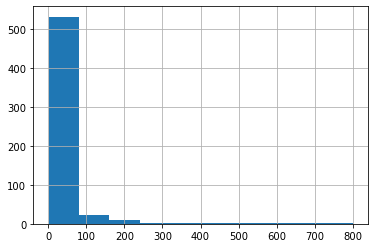

In [21]:
print(df['CRPRESU'].value_counts())
df['CRPRESU'].value_counts().hist()

# DF for Lab Work Vars

In [32]:
lab_work_vars = df [['CRPRESU', 'E2AVE', 'TSH']]
lab_work_vars

,CRPRESU,E2AVE,TSH
0,3.1,169.50,2.27
1,1.6,14.40,2.76
2,0.3,47.80,1.63
3,24.1,34.35,0.90
4,2.8,32.10,2.00
...,...,...,...
28784,NaN,22.00,2.19
28785,NaN,230.60,2.76
28786,NaN,21.85,0.85
28787,NaN,22.70,6.64


In [33]:
lab_work_vars.isna().sum()

CRPRESU    12052
E2AVE       4056
TSH        21405
dtype: int64

In [34]:
import sweetviz as sv

my_report = sv.analyze(lab_work_vars)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Lab Work EDA

## CRPRESU

In [294]:
CRPRESU = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 1) | (df["VISIT"] == 3) | (df["VISIT"] == 4) | (df["VISIT"] == 5) | (df["VISIT"] == 6) | (df["VISIT"] == 7)]

In [295]:
CRPRESU.VISIT.unique()

array([0, 1, 3, 4, 5, 6, 7])

In [296]:
CRPRESU = CRPRESU[["VISIT","SWANID","CRPRESU"]]

In [297]:
CRPRESU.head()

,VISIT,SWANID,CRPRESU
0,0,10005,3.1
1,0,10046,1.6
2,0,10056,0.3
3,0,10092,24.1
4,0,10126,2.8


In [298]:
CRPRESU.VISIT.value_counts()

0    3302
1    2881
3    2709
4    2679
5    2617
6    2448
7    2413
Name: VISIT, dtype: int64

In [299]:
CRPRESU = CRPRESU.loc[CRPRESU["CRPRESU"].notnull()]

In [300]:
CRPRESU.VISIT.value_counts()

0    3245
1    2705
4    2279
3    2271
5    2155
6    2085
7    1997
Name: VISIT, dtype: int64

In [302]:
print(3245/3302)
print(2705/2881)
print(2279/2709)
print(2271/2679)
print(2155/2617)
print(2085/2448)
print(1997/2413)

0.9827377347062386
0.9389101006594932
0.8412698412698413
0.8477043673012318
0.8234619793656859
0.8517156862745098
0.8276004973062577


In [304]:
my_report = sv.analyze(CRPRESU)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [308]:
CRPRESU.loc[CRPRESU["VISIT"] == 0].mean()

VISIT          0.000000
SWANID     54378.278274
CRPRESU        3.895742
dtype: float64

In [309]:
CRPRESU.loc[CRPRESU["VISIT"] == 1].mean()

VISIT          1.000000
SWANID     54586.466543
CRPRESU        3.698395
dtype: float64

In [310]:
CRPRESU.loc[CRPRESU["VISIT"] == 3].mean()

VISIT          3.000000
SWANID     54588.566711
CRPRESU        4.173042
dtype: float64

In [311]:
CRPRESU.loc[CRPRESU["VISIT"] == 4].mean()

VISIT          4.000000
SWANID     54750.461606
CRPRESU        3.851086
dtype: float64

In [312]:
CRPRESU.loc[CRPRESU["VISIT"] == 5].mean()

VISIT          5.000000
SWANID     54893.838979
CRPRESU        4.242692
dtype: float64

In [313]:
CRPRESU.loc[CRPRESU["VISIT"] == 6].mean()

VISIT          6.000000
SWANID     54104.800000
CRPRESU        4.058221
dtype: float64

In [314]:
CRPRESU.loc[CRPRESU["VISIT"] == 7].mean()

VISIT          7.000000
SWANID     54346.256385
CRPRESU        3.820405
dtype: float64

In [316]:
CRPRESU.loc[CRPRESU["VISIT"] == 0, 'CRP_MG/L'] = 3.89
CRPRESU.loc[CRPRESU["VISIT"] == 1, 'CRP_MG/L'] = 3.69
CRPRESU.loc[CRPRESU["VISIT"] == 3, 'CRP_MG/L'] = 4.17
CRPRESU.loc[CRPRESU["VISIT"] == 4, 'CRP_MG/L'] = 3.85
CRPRESU.loc[CRPRESU["VISIT"] == 5, 'CRP_MG/L'] = 4.24
CRPRESU.loc[CRPRESU["VISIT"] == 6, 'CRP_MG/L'] = 4.05
CRPRESU.loc[CRPRESU["VISIT"] == 7, 'CRP_MG/L'] = 3.82

In [317]:
CRPRESU.loc[CRPRESU["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"
CRPRESU.loc[CRPRESU["VISIT"] == 1, 'VISIT_NUM'] = "VISIT 1"
CRPRESU.loc[CRPRESU["VISIT"] == 3, 'VISIT_NUM'] = "VISIT 3"
CRPRESU.loc[CRPRESU["VISIT"] == 4, 'VISIT_NUM'] = "VISIT 4"
CRPRESU.loc[CRPRESU["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
CRPRESU.loc[CRPRESU["VISIT"] == 6, 'VISIT_NUM'] = "VISIT 6"
CRPRESU.loc[CRPRESU["VISIT"] == 7, 'VISIT_NUM'] = "VISIT 7"

<AxesSubplot:xlabel='VISIT_NUM', ylabel='CRP_MG/L'>

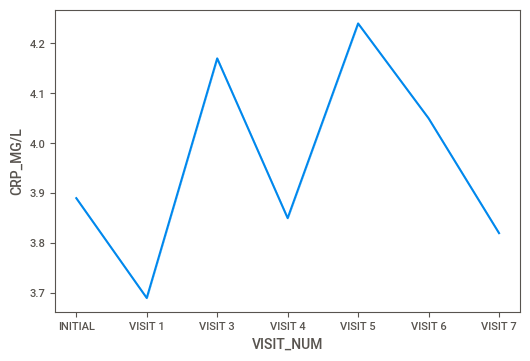

In [319]:
sns.lineplot(data=CRPRESU, x="VISIT_NUM", y="CRP_MG/L")

## E2AVE

In [321]:
E2AVE = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 1) | (df["VISIT"] == 2)| (df["VISIT"] == 3) | (df["VISIT"] == 4) | (df["VISIT"] == 5) | (df["VISIT"] == 6) | (df["VISIT"] == 7) | (df["VISIT"] == 8) | (df["VISIT"] == 9) | (df["VISIT"] == 10)]


In [325]:
E2AVE.VISIT.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [326]:
E2AVE = E2AVE[["VISIT","SWANID","E2AVE"]]

In [323]:
E2AVE.head()

,VISIT,SWANID,E2AVE
0,0,10005,169.50
1,0,10046,14.40
2,0,10056,47.80
3,0,10092,34.35
4,0,10126,32.10


<AxesSubplot:>

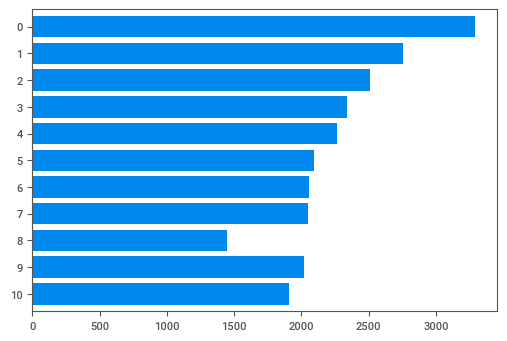

In [346]:
E2AVE.VISIT.value_counts().sort_index(ascending = False).plot(kind='barh', width = .8)

In [327]:
E2AVE = E2AVE.loc[E2AVE["E2AVE"].notnull()]

In [333]:
E2AVE.VISIT.value_counts()

0     3293
1     2752
2     2509
3     2341
4     2265
5     2097
6     2054
7     2047
9     2018
10    1907
8     1450
Name: VISIT, dtype: int64

In [331]:
print(0, 3293/3302)
print(1, 2752/2881)
print(2, 2509/2748)
print(3, 2341/2709)
print(4, 2265/2679)
print(5, 2097/2617)
print(6, 2054/2448)
print(7, 2047/2413)
print(8, 1450/2278)
print(9, 2018/2469)
print(10, 1907/2245)

0 0.997274379164143
1 0.9552238805970149
2 0.9130276564774381
3 0.864156515319306
4 0.845464725643897
5 0.8012991975544517
6 0.8390522875816994
7 0.8483215913800248
8 0.636523266022827
9 0.8173349534224382
10 0.8494432071269488


In [335]:
my_report = sv.analyze(E2AVE)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [347]:
E2AVE.loc[E2AVE["VISIT"] == 0].mean()

VISIT         0.000000
SWANID    54338.713028
E2AVE        76.738112
dtype: float64

In [348]:
E2AVE.loc[E2AVE["VISIT"] == 1].mean()

VISIT         1.000000
SWANID    54582.198401
E2AVE        74.016806
dtype: float64

In [349]:
E2AVE.loc[E2AVE["VISIT"] == 2].mean()

VISIT         2.000000
SWANID    54288.592268
E2AVE        71.148944
dtype: float64

In [350]:
E2AVE.loc[E2AVE["VISIT"] == 3].mean()

VISIT         3.000000
SWANID    54647.737719
E2AVE        66.707027
dtype: float64

In [351]:
E2AVE.loc[E2AVE["VISIT"] == 4].mean()

VISIT         4.000000
SWANID    54743.542605
E2AVE        67.809514
dtype: float64

In [352]:
E2AVE.loc[E2AVE["VISIT"] == 5].mean()

VISIT         5.000000
SWANID    55052.671435
E2AVE        59.498593
dtype: float64

In [353]:
E2AVE.loc[E2AVE["VISIT"] == 6].mean()

VISIT         6.000000
SWANID    54163.142648
E2AVE        49.729990
dtype: float64

In [354]:
E2AVE.loc[E2AVE["VISIT"] == 7].mean()

VISIT         7.000000
SWANID    54517.736688
E2AVE        46.128017
dtype: float64

In [355]:
E2AVE.loc[E2AVE["VISIT"] == 8].mean()

VISIT         8.000000
SWANID    54187.931724
E2AVE        45.755931
dtype: float64

In [356]:
E2AVE.loc[E2AVE["VISIT"] == 9].mean()

VISIT         9.000000
SWANID    54652.505451
E2AVE        33.764338
dtype: float64

In [357]:
E2AVE.loc[E2AVE["VISIT"] == 10].mean()

VISIT        10.000000
SWANID    54206.546408
E2AVE        28.770207
dtype: float64

In [361]:
E2AVE.loc[E2AVE["VISIT"] == 0, 'pg/mL'] = 76.7
E2AVE.loc[E2AVE["VISIT"] == 1, 'pg/mL'] = 74
E2AVE.loc[E2AVE["VISIT"] == 2, 'pg/mL'] = 71.1
E2AVE.loc[E2AVE["VISIT"] == 3, 'pg/mL'] = 66.7
E2AVE.loc[E2AVE["VISIT"] == 4, 'pg/mL'] = 67.8
E2AVE.loc[E2AVE["VISIT"] == 5, 'pg/mL'] = 59.4
E2AVE.loc[E2AVE["VISIT"] == 6, 'pg/mL'] = 49.7
E2AVE.loc[E2AVE["VISIT"] == 7, 'pg/mL'] = 46.1
E2AVE.loc[E2AVE["VISIT"] == 8, 'pg/mL'] = 45.6
E2AVE.loc[E2AVE["VISIT"] == 9, 'pg/mL'] = 33.7
E2AVE.loc[E2AVE["VISIT"] == 10, 'pg/mL'] = 28.8

In [365]:
E2AVE.loc[E2AVE["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"
E2AVE.loc[E2AVE["VISIT"] == 1, 'VISIT_NUM'] = "VISIT 1"
E2AVE.loc[E2AVE["VISIT"] == 2, 'VISIT_NUM'] = "VISIT 2"
E2AVE.loc[E2AVE["VISIT"] == 3, 'VISIT_NUM'] = "VISIT 3"
E2AVE.loc[E2AVE["VISIT"] == 4, 'VISIT_NUM'] = "VISIT 4"
E2AVE.loc[E2AVE["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
E2AVE.loc[E2AVE["VISIT"] == 6, 'VISIT_NUM'] = "VISIT 6"
E2AVE.loc[E2AVE["VISIT"] == 7, 'VISIT_NUM'] = "VISIT 7"
E2AVE.loc[E2AVE["VISIT"] == 8, 'VISIT_NUM'] = "VISIT 8"
E2AVE.loc[E2AVE["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
E2AVE.loc[E2AVE["VISIT"] == 10, 'VISIT_NUM'] = "VISIT 10"

<AxesSubplot:xlabel='VISIT_NUM', ylabel='pg/mL'>

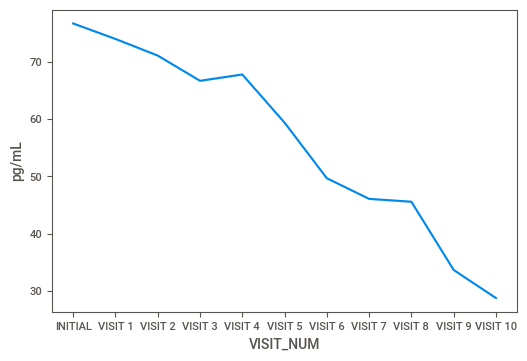

In [366]:
sns.lineplot(data=E2AVE, x="VISIT_NUM", y="pg/mL")

# TSH

In [368]:
TSH = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 4) | (df["VISIT"] == 10)]

In [369]:
ALLARE.VISIT.unique()

array([0, 5, 9])

In [370]:
TSH = TSH[["VISIT","SWANID","TSH"]]

In [371]:
TSH.head()

,VISIT,SWANID,TSH
0,0,10005,2.27
1,0,10046,2.76
2,0,10056,1.63
3,0,10092,0.90
4,0,10126,2.00


In [373]:
TSH.VISIT.value_counts()

0     3302
4     2679
10    2245
Name: VISIT, dtype: int64

In [374]:
TSH = TSH.loc[TSH["TSH"].notnull()]

In [375]:
TSH.VISIT.value_counts()

0     3263
4     2240
10    1881
Name: VISIT, dtype: int64

In [398]:
print(3263/3302)
print(2240/2679)
print(1881/2245)

0.9881889763779528
0.8361328854050019
0.8378619153674833


In [377]:
my_report = sv.analyze(TSH)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [378]:
TSH.loc[TSH["VISIT"] == 0].mean()

VISIT         0.000000
SWANID    54276.502298
TSH           2.581958
dtype: float64

In [379]:
TSH.loc[TSH["VISIT"] == 4].mean()

VISIT         4.000000
SWANID    54778.429911
TSH           2.836710
dtype: float64

In [380]:
TSH.loc[TSH["VISIT"] == 10].mean()

VISIT        10.000000
SWANID    54326.324296
TSH           2.396422
dtype: float64

In [383]:
TSH.loc[TSH["VISIT"] == 10, 'uIU/mL'] = 2.39
TSH.loc[TSH["VISIT"] == 4, 'uIU/mL'] = 2.83
TSH.loc[TSH["VISIT"] == 0, 'uIU/mL'] = 2.58

In [384]:
TSH.loc[TSH["VISIT"] == 10, 'VISIT_NUM'] = "VISIT 10"
TSH.loc[TSH["VISIT"] == 4, 'VISIT_NUM'] = "VISIT 4"
TSH.loc[TSH["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"

(2.0, 3.0)

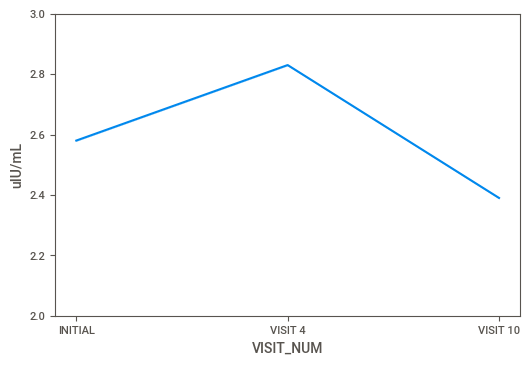

In [386]:
sns.lineplot(data=TSH, x="VISIT_NUM", y="uIU/mL")
plt.ylim(2,3)

In [401]:
TSH[TSH['TSH'] >= 3].VISIT.count()

1695

# Supplement EDA

In [ ]:
ALLARE*
ALLVITD*
ALLVITE*
ALLVITC*
ALLB12*
ALLB1*
ALLB6

In [38]:
supp_mg_est = df[['ALLARE', 'ALLVITD', 'ALLVITE', 'ALLVITC', 'ALLB12', 'ALLB1', 'ALLB6']]
supp_mg_est

,ALLARE,ALLVITD,ALLVITE,ALLVITC,ALLB12,ALLB1,ALLB6
0,4009.36,NaN,9.15,653.59,NaN,1.20,1.70
1,1127.45,NaN,12.11,159.85,NaN,2.55,2.67
2,995.60,NaN,277.43,574.32,NaN,1.14,1.63
3,2140.26,NaN,20.37,185.86,NaN,1.79,2.80
4,316.96,NaN,6.08,57.28,NaN,0.50,0.65
...,...,...,...,...,...,...,...
28784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28787,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# SweetViz for supp_mg_est

my_report = sv.analyze(supp_mg_est)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## ALLARE 

In [127]:
ALLARE = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 5) | (df["VISIT"] == 9)]

In [128]:
ALLARE.VISIT.unique()

array([0, 5, 9])

In [151]:
ALLARE = ALLARE[["VISIT","SWANID","ALLARE"]]

In [152]:
ALLARE 

,VISIT,SWANID,ALLARE
0,0,10005,4009.36
1,0,10046,1127.45
2,0,10056,995.60
3,0,10092,2140.26
4,0,10126,316.96
...,...,...,...
26539,9,99805,4158.71
26540,9,99809,5721.74
26541,9,99888,6917.86
26542,9,99898,18971.09


In [153]:
ALLARE.VISIT.value_counts()

0    3302
5    2617
9    2469
Name: VISIT, dtype: int64

In [154]:
ALLARE = ALLARE.loc[ALLARE["ALLARE"].notnull()]

In [155]:
ALLARE

,VISIT,SWANID,ALLARE
0,0,10005,4009.36
1,0,10046,1127.45
2,0,10056,995.60
3,0,10092,2140.26
4,0,10126,316.96
...,...,...,...
26539,9,99805,4158.71
26540,9,99809,5721.74
26541,9,99888,6917.86
26542,9,99898,18971.09


In [156]:
ALLARE.VISIT.value_counts()

0    3133
5    2125
9    1738
Name: VISIT, dtype: int64

In [132]:
print(3133/3302)
print(2125/2617)
print(1738/2469)

0.9488188976377953
0.8119984715322889
0.7039287160793843


In [91]:
my_report = sv.analyze(ALLARE)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [95]:
ALLARE.loc[ALLARE["VISIT"] == 0].mean()

VISIT         0.000000
SWANID    54355.000958
ALLARE     2666.164587
dtype: float64

In [96]:
ALLARE.loc[ALLARE["VISIT"] == 5].mean()

VISIT         5.000000
SWANID    54783.896000
ALLARE     9164.291934
dtype: float64

In [97]:
ALLARE.loc[ALLARE["VISIT"] == 9].mean()

VISIT         9.000000
SWANID    54610.342348
ALLARE     9277.649827
dtype: float64

In [103]:
ALLARE.loc[ALLARE["VISIT"] == 9, 'AVG_DOSE_MG'] = 9278
ALLARE.loc[ALLARE["VISIT"] == 5, 'AVG_DOSE_MG'] = 9164
ALLARE.loc[ALLARE["VISIT"] == 0, 'AVG_DOSE_MG'] = 2666

/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [101]:
ALLARE.loc[ALLARE["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLARE.loc[ALLARE["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
ALLARE.loc[ALLARE["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"

/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='VISIT_NUM', ylabel='AVG_DOSE_MG'>

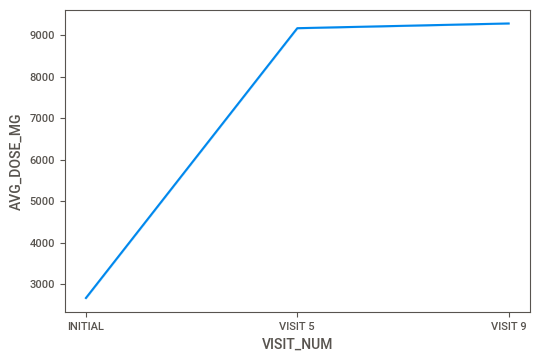

In [104]:
sns.lineplot(data=ALLARE, x="VISIT_NUM", y="AVG_DOSE_MG")

# ALLVITD

In [133]:
ALLVITD = df.loc[(df["VISIT"] == 5) | (df["VISIT"] == 9)]

In [134]:
print(ALLVITD.VISIT.unique())
ALLVITD = ALLVITD[["VISIT","SWANID","ALLVITD"]]

[5 9]


In [135]:
ALLVITD.head()

,VISIT,SWANID,ALLVITD
14319,5,10046,543.51
14320,5,10056,97.29
14321,5,10126,13.86
14322,5,10153,149.89
14323,5,10196,583.55
...,...,...,...
26539,9,99805,29.99
26540,9,99809,175.47
26541,9,99888,190.14
26542,9,99898,661.84


In [137]:
ALLVITD.VISIT.value_counts()

5    2617
9    2469
Name: VISIT, dtype: int64

In [111]:
ALLVITD = ALLVITD.loc[ALLVITD["ALLVITD"].notnull()]

In [112]:
ALLVITD

,VISIT,SWANID,ALLVITD
14319,5,10046,543.51
14320,5,10056,97.29
14321,5,10126,13.86
14322,5,10153,149.89
14323,5,10196,583.55
...,...,...,...
26539,9,99805,29.99
26540,9,99809,175.47
26541,9,99888,190.14
26542,9,99898,661.84


In [ ]:
ALLVITD

In [114]:
print(ALLVITD.VISIT.value_counts())
ALLVITD.ALLVITD.isna().sum()

5    2125
9    1735
Name: VISIT, dtype: int64


0

In [138]:
print(2125/2617)
print(1735/2469)

0.8119984715322889
0.7027136492507088


In [116]:
my_report = sv.analyze(ALLVITD)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [118]:
ALLVITD.loc[ALLVITD["VISIT"] == 5].mean()

VISIT          5.00000
SWANID     54783.89600
ALLVITD      324.01648
dtype: float64

In [119]:
ALLVITD.loc[ALLVITD["VISIT"] == 9].mean()

VISIT          9.000000
SWANID     54606.785014
ALLVITD      335.175470
dtype: float64

In [120]:
ALLVITD.loc[ALLVITD["VISIT"] == 9, 'AVG_DOSE_MG'] = 335
ALLVITD.loc[ALLVITD["VISIT"] == 5, 'AVG_DOSE_MG'] = 324

/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [121]:
ALLVITD.loc[ALLVITD["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLVITD.loc[ALLVITD["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"

(300.0, 350.0)

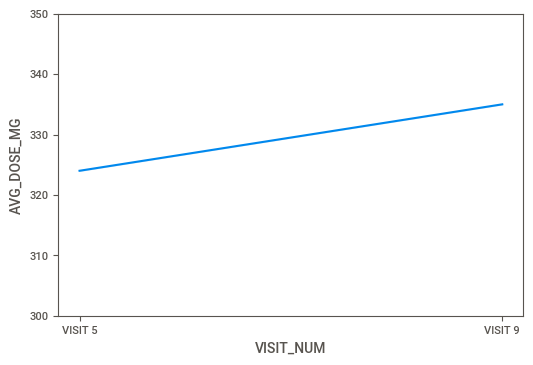

In [123]:
sns.lineplot(data=ALLVITD, x="VISIT_NUM", y="AVG_DOSE_MG")
plt.ylim(300, 350)

# ALLVITE

In [139]:
ALLVITE = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 5) | (df["VISIT"] == 9)]

In [140]:
ALLVITE = ALLVITE[["VISIT","SWANID","ALLVITE"]]

In [141]:
ALLVITE.VISIT.value_counts()

0    3302
5    2617
9    2469
Name: VISIT, dtype: int64

In [147]:
ALLVITE.head()

,VISIT,SWANID,ALLVITE
0,0,10005,9.15
1,0,10046,12.11
2,0,10056,277.43
3,0,10092,20.37
4,0,10126,6.08


In [143]:
ALLVITE = ALLVITE.loc[ALLVITE["ALLVITE"].notnull()]

In [148]:
print(ALLVITE.VISIT.unique())
ALLVITE.shape

[0 5 9]


(6996, 3)

In [150]:
print(ALLVITE.VISIT.value_counts())
ALLVITE.ALLVITE.isna().sum()

0    3133
5    2125
9    1738
Name: VISIT, dtype: int64


0

In [157]:
print(3133/3302)
print(2125/2617)
print(1738/2469)

0.9488188976377953
0.8119984715322889
0.7039287160793843


In [158]:
my_report = sv.analyze(ALLVITE)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [166]:
ALLVITE.loc[ALLVITE["VISIT"] == 0].mean()

VISIT          0.000000
SWANID     54355.000958
ALLVITE       61.754440
dtype: float64

In [167]:
ALLVITE.loc[ALLVITE["VISIT"] == 5].mean()

VISIT          5.000000
SWANID     54783.896000
ALLVITE       84.150922
dtype: float64

In [168]:
ALLVITE.loc[ALLVITE["VISIT"] == 9].mean()

VISIT          9.000000
SWANID     54610.342348
ALLVITE       55.670731
dtype: float64

In [169]:
ALLVITE.loc[ALLVITE["VISIT"] == 9, 'AVG_DOSE_MG'] = 56
ALLVITE.loc[ALLVITE["VISIT"] == 5, 'AVG_DOSE_MG'] = 84
ALLVITE.loc[ALLVITE["VISIT"] == 0, 'AVG_DOSE_MG'] = 62

/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [172]:
ALLVITE.loc[ALLVITE["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLVITE.loc[ALLVITE["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
ALLVITE.loc[ALLVITE["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"

/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/josephreynolds/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='VISIT_NUM', ylabel='AVG_DOSE_MG'>

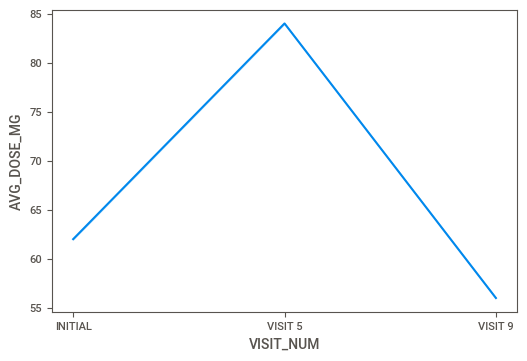

In [173]:
sns.lineplot(data=ALLVITE, x="VISIT_NUM", y="AVG_DOSE_MG")

# ALLB12

In [187]:
ALLB12 = df.loc[(df["VISIT"] == 5) | (df["VISIT"] == 9)]

In [188]:
print(ALLB12.VISIT.unique())
ALLB12 = ALLB12[["VISIT","SWANID","ALLB12"]]

[5 9]


In [189]:
ALLB12.head()

,VISIT,SWANID,ALLB12
14319,5,10046,9.32
14320,5,10056,2.52
14321,5,10126,0.54
14322,5,10153,3.39
14323,5,10196,8.90


In [190]:
ALLB12.VISIT.value_counts()

5    2617
9    2469
Name: VISIT, dtype: int64

In [191]:
ALLB12 = ALLB12.loc[ALLB12["ALLB12"].notnull()]

In [192]:
ALLB12.head()

,VISIT,SWANID,ALLB12
14319,5,10046,9.32
14320,5,10056,2.52
14321,5,10126,0.54
14322,5,10153,3.39
14323,5,10196,8.90


In [193]:
ALLB12.VISIT.value_counts()

5    2125
9    1735
Name: VISIT, dtype: int64

In [194]:
print(2125/2617)
print(1735/2469)

0.8119984715322889
0.7027136492507088


In [196]:
my_report = sv.analyze(ALLB12)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [197]:
ALLB12.loc[ALLB12["VISIT"] == 5].mean()

VISIT         5.000000
SWANID    54783.896000
ALLB12        5.508273
dtype: float64

In [198]:
ALLB12.loc[ALLB12["VISIT"] == 9].mean()

VISIT         9.000000
SWANID    54606.785014
ALLB12        5.704069
dtype: float64

In [206]:
ALLB12.loc[ALLB12["VISIT"] == 9, 'AVG_DOSE_MCG'] = 5.7
ALLB12.loc[ALLB12["VISIT"] == 5, 'AVG_DOSE_MCG'] = 5.5

In [207]:
ALLB12.loc[ALLB12["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLB12.loc[ALLB12["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"

(4.0, 8.0)

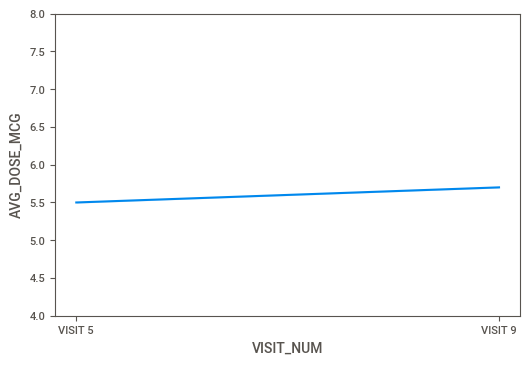

In [212]:
sns.lineplot(data=ALLB12, x="VISIT_NUM", y="AVG_DOSE_MCG")
plt.ylim(4,8)

# ALLB1

In [219]:
ALLB1 = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 5) | (df["VISIT"] == 9)]

In [220]:
ALLB1 = ALLB1[["VISIT","SWANID","ALLB1"]]

In [221]:
ALLB1.VISIT.value_counts()

0    3302
5    2617
9    2469
Name: VISIT, dtype: int64

In [222]:
ALLB1.head()

,VISIT,SWANID,ALLB1
0,0,10005,1.20
1,0,10046,2.55
2,0,10056,1.14
3,0,10092,1.79
4,0,10126,0.50


In [223]:
ALLB1 = ALLB1.loc[ALLB1["ALLB1"].notnull()]

In [224]:
print(ALLB1.VISIT.unique())
ALLB1.shape

[0 5 9]


(6996, 3)

In [225]:
print(ALLB1.VISIT.value_counts())
ALLB1.ALLB1.isna().sum()

0    3133
5    2125
9    1738
Name: VISIT, dtype: int64


0

In [227]:
print(3133/3302)
print(2125/2617)
print(1738/2469)

0.9488188976377953
0.8119984715322889
0.7039287160793843


In [226]:
my_report = sv.analyze(ALLB1)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [228]:
ALLB1.loc[ALLB1["VISIT"] == 0].mean()

VISIT         0.000000
SWANID    54355.000958
ALLB1         1.720996
dtype: float64

In [229]:
ALLB1.loc[ALLB1["VISIT"] == 5].mean()

VISIT         5.000000
SWANID    54783.896000
ALLB1         1.941252
dtype: float64

In [230]:
ALLB1.loc[ALLB1["VISIT"] == 9].mean()

VISIT         9.000000
SWANID    54610.342348
ALLB1         1.919931
dtype: float64

In [231]:
ALLB1.loc[ALLB1["VISIT"] == 9, 'AVG_DOSE_MG'] = 1.91
ALLB1.loc[ALLB1["VISIT"] == 5, 'AVG_DOSE_MG'] = 1.94
ALLB1.loc[ALLB1["VISIT"] == 0, 'AVG_DOSE_MG'] = 1.72

In [232]:
ALLB1.loc[ALLB1["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLB1.loc[ALLB1["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
ALLB1.loc[ALLB1["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"

(0.0, 5.0)

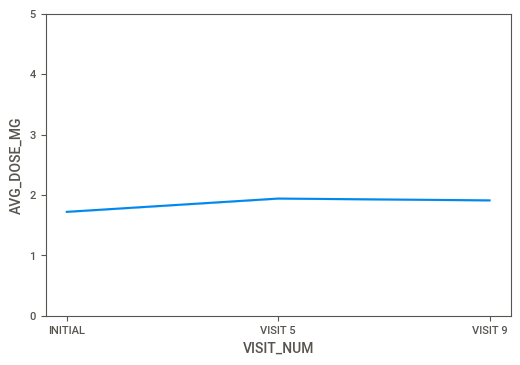

In [234]:
sns.lineplot(data=ALLB1, x="VISIT_NUM", y="AVG_DOSE_MG")
plt.ylim(0,5)

# ALLB6

In [235]:
ALLB6 = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 5) | (df["VISIT"] == 9)]
ALLB6 = ALLB6[["VISIT","SWANID","ALLB6"]]

In [236]:
ALLB6.VISIT.value_counts()

0    3302
5    2617
9    2469
Name: VISIT, dtype: int64

In [237]:
ALLB6.head()

,VISIT,SWANID,ALLB6
0,0,10005,1.70
1,0,10046,2.67
2,0,10056,1.63
3,0,10092,2.80
4,0,10126,0.65


In [238]:
ALLB6 = ALLB6.loc[ALLB6["ALLB6"].notnull()]

In [239]:
ALLB6.VISIT.value_counts()

0    3133
5    2125
9    1738
Name: VISIT, dtype: int64

In [240]:
print(3133/3302)
print(2125/2617)
print(1738/2469)

0.9488188976377953
0.8119984715322889
0.7039287160793843


In [241]:
my_report = sv.analyze(ALLB6)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [245]:
ALLB6.loc[ALLB6["VISIT"] == 0].mean()

VISIT         0.000000
SWANID    54355.000958
ALLB6         2.059521
dtype: float64

In [246]:
ALLB6.loc[ALLB6["VISIT"] == 5].mean()

VISIT         5.000000
SWANID    54783.896000
ALLB6         2.360466
dtype: float64

In [247]:
ALLB6.loc[ALLB6["VISIT"] == 9].mean()

VISIT         9.000000
SWANID    54610.342348
ALLB6         2.404914
dtype: float64

In [253]:
ALLB6.loc[ALLB6["VISIT"] == 9, 'AVG_DOSE_MG'] = 2.4
ALLB6.loc[ALLB6["VISIT"] == 5, 'AVG_DOSE_MG'] = 2.36
ALLB6.loc[ALLB6["VISIT"] == 0, 'AVG_DOSE_MG'] = 2.05

In [254]:
ALLB6.loc[ALLB6["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLB6.loc[ALLB6["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
ALLB6.loc[ALLB6["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"

(0.0, 5.0)

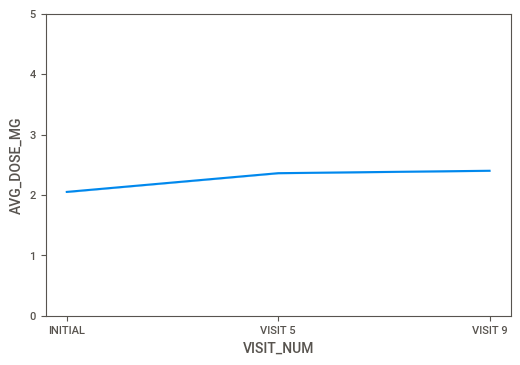

In [255]:
sns.lineplot(data=ALLB6, x="VISIT_NUM", y="AVG_DOSE_MG")
plt.ylim(0,5)

# ALLVITC

In [260]:
ALLVITC = df.loc[(df["VISIT"] == 0) | (df["VISIT"] == 5) | (df["VISIT"] == 9)]
ALLVITC = ALLVITC[["VISIT","SWANID","ALLVITC"]]

In [261]:
ALLVITC.VISIT.value_counts()

0    3302
5    2617
9    2469
Name: VISIT, dtype: int64

In [262]:
ALLVITC.head()

,VISIT,SWANID,ALLVITC
0,0,10005,653.59
1,0,10046,159.85
2,0,10056,574.32
3,0,10092,185.86
4,0,10126,57.28


In [263]:
ALLVITC = ALLVITC.loc[ALLVITC["ALLVITC"].notnull()]

In [264]:
ALLVITC.VISIT.value_counts()

0    3133
5    2125
9    1738
Name: VISIT, dtype: int64

In [265]:
print(3133/3302)
print(2125/2617)
print(1738/2469)

0.9488188976377953
0.8119984715322889
0.7039287160793843


In [266]:
my_report = sv.analyze(ALLVITC)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [267]:
ALLVITC.loc[ALLVITC["VISIT"] == 0].mean()

VISIT          0.000000
SWANID     54355.000958
ALLVITC      273.997766
dtype: float64

In [268]:
ALLVITC.loc[ALLVITC["VISIT"] == 5].mean()

VISIT          5.000000
SWANID     54783.896000
ALLVITC      271.388296
dtype: float64

In [269]:
ALLVITC.loc[ALLVITC["VISIT"] == 9].mean()

VISIT          9.000000
SWANID     54610.342348
ALLVITC      255.015840
dtype: float64

In [272]:
ALLVITC.loc[ALLVITC["VISIT"] == 9, 'AVG_DOSE_MG'] = 255
ALLVITC.loc[ALLVITC["VISIT"] == 5, 'AVG_DOSE_MG'] = 271
ALLVITC.loc[ALLVITC["VISIT"] == 0, 'AVG_DOSE_MG'] = 273

In [273]:
ALLVITC.loc[ALLVITC["VISIT"] == 9, 'VISIT_NUM'] = "VISIT 9"
ALLVITC.loc[ALLVITC["VISIT"] == 5, 'VISIT_NUM'] = "VISIT 5"
ALLVITC.loc[ALLVITC["VISIT"] == 0, 'VISIT_NUM'] = "INITIAL"

(250.0, 300.0)

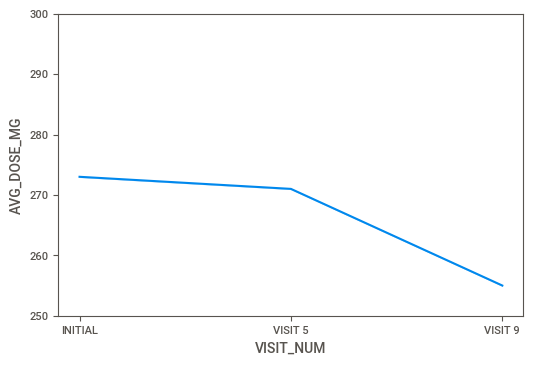

In [276]:
sns.lineplot(data=ALLVITC, x="VISIT_NUM", y="AVG_DOSE_MG")
plt.ylim(250,300)